In [1]:
import pandas as pd

In [2]:
df = pd.read_excel(r"mod_NBER-CES Manufacturing Industry Database (sic5811).xls")

In [3]:
device_sic = [3693, 3841, 3842, 3843, 3851]  #From Managing the Medical Arms Race

In [7]:
df.head()

,sic,year,emp,pay,dtfp5,dtfp4
0,2011,1958,200.9,1067.8,NaN,NaN
1,2011,1959,197.2,1101.0,0.033,0.033
2,2011,1960,194.2,1138.6,0.049,0.049
3,2011,1961,189.3,1143.2,-0.016,-0.016
4,2011,1962,185.6,1161.1,0.003,0.003


In [4]:
# Dataframe with device SIC codes
filt = df["sic"].isin(device_sic)
device_df = df.loc[filt]

# Dataframe without device SIC codes
other_df = df.loc[~filt]

In [5]:
# Group the dataframes by year
device_years = device_df.groupby(["year"])
other_years = other_df.groupby(["year"])

## Annual Change in 5-factor Total Factor Productivity

In [38]:
#Produce dictionary of data
device_dtfp5 = {"Medical Device Industry":[], "Other Industries":[]}
for i in range(1959, 2012):
    device_dtfp5["Medical Device Industry"].append(device_years.get_group(i)["dtfp5"].median())
    device_dtfp5["Other Industries"].append(other_years.get_group(i)["dtfp5"].median())

<AxesSubplot:>

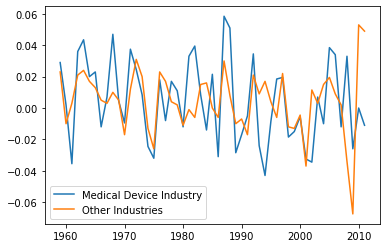

In [41]:
pd.DataFrame.from_dict(device_dtfp5).set_index(pd.Index(list(range(1959, 2012)))).plot(kind='line')

## Annual Change in Sum of Employment

In [43]:
def find_delta_with_sums(device_years_inner, other_years_inner, column):
    data_dict = {"Medical Device Industry":[], "Other Industries":[]}
    
    device_list = [device_years_inner.get_group(i)[column].sum() for i in range(1958, 2012)]
    other_list = [other_years_inner.get_group(i)[column].sum() for i in range(1958, 2012)]
    
    for i in range(53): #53
        data_dict["Medical Device Industry"].append((device_list[i + 1]/device_list[i])-1)  #Previous year divided by current year for ratio
        data_dict["Other Industries"].append((other_list[i + 1]/other_list[i])-1)
    
    return data_dict

<AxesSubplot:>

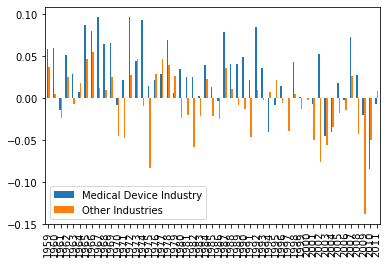

In [44]:
# Employment
pd.DataFrame.from_dict(find_delta_with_sums(device_years, other_years, "emp")).set_index(pd.Index(list(range(1959, 2012)))).plot(kind='bar')

<AxesSubplot:>

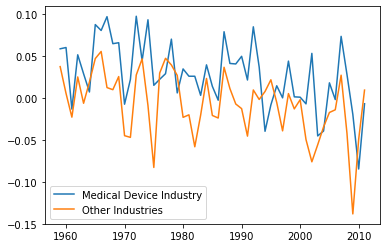

In [45]:
# Employment
pd.DataFrame.from_dict(find_delta_with_sums(device_years, other_years, "emp")).set_index(pd.Index(list(range(1959, 2012)))).plot(kind='line')